# Budget Analysis

---

## Environment Setup

In [3]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [4]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [5]:
# Set environment variables from the .env file
load_dotenv()

True

In [6]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [7]:
# Create the client object
client = plaid.Client(
    client_id=PLAID_CLIENT_ID,
    secret=PLAID_SECRET,
    public_key=PLAID_PUBLIC_KEY,
    environment="sandbox"
)

In [8]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [9]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(
    INSITUTION_ID,
    ["transactions","income","assets"]
)
# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-b2aebb57-9ce8-4660-a37a-0ee69d19b520', 'request_id': 'STorA7aBsX2ndaR'}


### 3. Exchange the public token for an access token

In [10]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response["public_token"])
# Print the access toke
print(exchange_response)

{'access_token': 'access-sandbox-b446dfb3-6041-44c3-9e3d-350f3762024c', 'item_id': 'RDWpNpo5r6HXAp1NdyJai5oEBdK5NNURoGnQB', 'request_id': '5wYBqA1BgxMd0zh'}


In [11]:
# Store the access token in a Python variable
access_token = exchange_response["access_token"]

### 4. Fetch Accounts

In [12]:
# Retrieve accounts
Accounts_response = client.Accounts.get(access_token)
# Print accounts
pretty_print_response(Accounts_response["accounts"][:3])

[
    {
        "account_id": "3AyE7EdpqoUV4DkX1pxjI39y69a4jncqRRApW",
        "balances": {
            "available": 100,
            "current": 110,
            "iso_currency_code": "USD",
            "limit": null,
            "unofficial_currency_code": null
        },
        "mask": "0000",
        "name": "Plaid Checking",
        "official_name": "Plaid Gold Standard 0% Interest Checking",
        "subtype": "checking",
        "type": "depository"
    },
    {
        "account_id": "xnA8e857PyIDLG4JzkeyuM8py853dXfnBB1og",
        "balances": {
            "available": 200,
            "current": 210,
            "iso_currency_code": "USD",
            "limit": null,
            "unofficial_currency_code": null
        },
        "mask": "1111",
        "name": "Plaid Saving",
        "official_name": "Plaid Silver Standard 0.1% Interest Saving",
        "subtype": "savings",
        "type": "depository"
    },
    {
        "account_id": "XWyAZAB5a6FoM8gZ75Bni6EKVEXgqAudEEQ48"

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [13]:
# Set the start and end date 90 days from today
start_date = "{:%Y-%m-%d}".format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = "{:%Y-%m-%d}".format(datetime.datetime.now())
# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)
# Print the transactions

pretty_print_response(transaction_response["transactions"][:3])

[
    {
        "account_id": "3AyE7EdpqoUV4DkX1pxjI39y69a4jncqRRApW",
        "account_owner": null,
        "amount": 12,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants",
            "Fast Food"
        ],
        "category_id": "13005032",
        "date": "2020-07-11",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": "3322"
        },
        "merchant_name": "McDonald's",
        "name": "McDonald's",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "

### 2. Print the categories for each transaction

In [14]:
# Create a for-loop to print the categories for each transaction

transaction_categories = [transaction["category"] for transaction in transaction_response['transactions']]

pretty_print_response(transaction_categories)

[
    [
        "Food and Drink",
        "Restaurants",
        "Fast Food"
    ],
    [
        "Food and Drink",
        "Restaurants",
        "Coffee Shop"
    ],
    [
        "Food and Drink",
        "Restaurants"
    ],
    [
        "Transfer",
        "Credit"
    ],
    [
        "Travel",
        "Airlines and Aviation Services"
    ],
    [
        "Travel",
        "Taxi"
    ],
    [
        "Food and Drink",
        "Restaurants"
    ],
    [
        "Payment"
    ],
    [
        "Food and Drink",
        "Restaurants",
        "Fast Food"
    ],
    [
        "Shops",
        "Sporting Goods"
    ],
    [
        "Payment",
        "Credit Card"
    ],
    [
        "Travel",
        "Taxi"
    ],
    [
        "Transfer",
        "Debit"
    ],
    [
        "Transfer",
        "Deposit"
    ],
    [
        "Recreation",
        "Gyms and Fitness Centers"
    ],
    [
        "Travel",
        "Airlines and Aviation Services"
    ],
    [
        "Food and Drink",


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [15]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
df2 = pd.DataFrame(columns=['date','name','amount','category'])
# Retrieve all the transactions
transaction_response['transactions']
# Populate the transactions DataFrame with the transactions data
i=0
for response in transaction_response['transactions']:
     
     df2.loc[i]= [response["date"],response["name"],response["amount"],response["category"][0]]
     i=i+1
# Display sample data from the DataFrame    
df2.head()

,date,name,amount,category
0,2020-07-11,McDonald's,12,Food and Drink
1,2020-07-11,Starbucks,4.33,Food and Drink
2,2020-07-10,SparkFun,89.4,Food and Drink
3,2020-07-09,INTRST PYMNT,-4.22,Transfer
4,2020-06-29,United Airlines,500,Travel


In [16]:
### 4. Convert the data types to the appropriate types 

# (i.e. datetimeindex for the date and float for the amount)
df2.amount = df2.amount.astype(float)
df2['date'] = pd.to_datetime(df2['date'])


In [17]:
# Display data types
df2.dtypes


date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

In [18]:
# Make any required data type transformation
df2 = df2.astype({"name": str, "category": str})

In [19]:
# Set the date column as index
df2.set_index('date',inplace=True)
# Display sample data
df2.head()

,name,amount,category
date,,,
2020-07-11,McDonald's,12.00,Food and Drink
2020-07-11,Starbucks,4.33,Food and Drink
2020-07-10,SparkFun,89.40,Food and Drink
2020-07-09,INTRST PYMNT,-4.22,Transfer
2020-06-29,United Airlines,500.00,Travel


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [20]:
# Fetch de income data
income_data =client.Income.get(access_token)
# Print the income data
# print(json.dumps(income_data["income"],indent=4, sort_keys=True))
pretty_print_response(income_data["income"])

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [21]:
# Determine the previous year's gross income and print the results
prev_yea_g_income= income_data["income"]["last_year_income_before_tax"]
print(f'previous years gross income ={prev_yea_g_income}')

previous years gross income =7285


In [22]:
# Determine the current monthly income and print the results
mon_g_income=income_data["income"]["income_streams"][0]["monthly_income"]
print(f'current monthly income = {mon_g_income}')

current monthly income = 500


In [23]:
# Determine the projected yearly income and print the results
P_yearly_income= income_data["income"]["projected_yearly_income"]
print(f'Projected yearly income = {P_yearly_income}')

Projected yearly income = 6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [24]:
# Compute the total expenses per category
transaction_by_category = df2.groupby(["category"])[["amount"]].sum()
# Display the expenses per catefory
transaction_by_category


,amount
category,
Food and Drink,3333.52
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


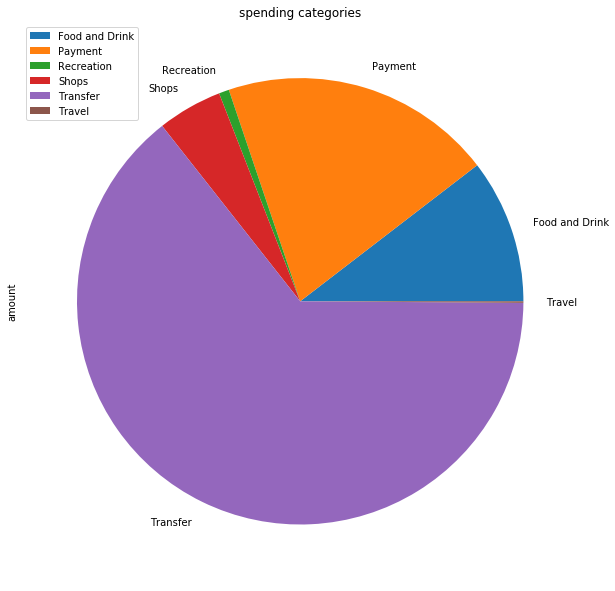

In [25]:
# Create a spending categories pie chart.
transaction_by_category.plot.pie(y='amount', figsize=(10, 20),title='spending categories')

### Calculate the expenses per month

In [26]:
# Create a DataFrame with the total expenses
df2.reset_index(inplace=True)
df2['month'] = df2['date'].dt.month
expenses_per_month = df2.groupby(["month"])[["amount"]].sum()
#Display sample data
expenses_per_month


,amount
month,
4,10560.06
5,10645.24
6,10645.24
7,101.51


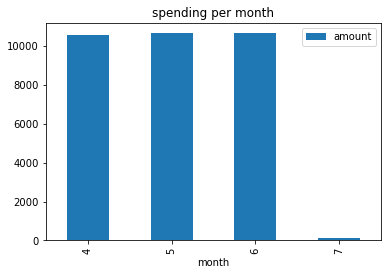

In [27]:
# Create a spending per month bar chart
expenses_per_month.plot.bar(title='spending per month')